# Assignment 1
## Experiments

Seems like you've already implemented all the building blocks of the neural networks. Now we will conduct several experiments.

Note: These experiments will not be evaluated.

## Table of contents
* [0-Circles Classification Task](#1.-Circles Classification Task)

* [1-Digits Classification Task](#1.-Digits Classification Task)


# 0- Circles Classification Task

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 

We will import the functions from the "Blocks ipython notebook" and will use them for training a network for classification task.

In [30]:
%%capture
%run 1.Blocks.ipynb

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In this first task we will classify two circles by training a neural network. 

The main purpose of this task is to understand the **importance of network design and parameters tuning (Number of layers, Number of hidden units etc)**. At first we will generate and visualize the data in following cell.

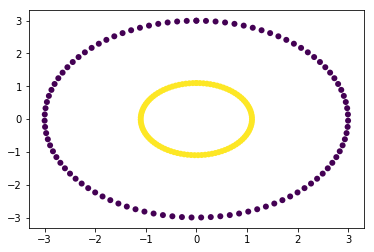

In [29]:
# Generate some data
N = 100
phi = np.linspace(0.0, np.pi * 2, 100)
X1 = 1.1 * np.array([np.sin(phi), np.cos(phi)])
X2 = 3.0 * np.array([np.sin(phi), np.cos(phi)])

Y = np.concatenate([np.ones(N), -1.0 * np.ones(N)]).reshape((-1, 1))

X = np.hstack([X1,X2]).T
plt.scatter(X[:,0],X[:,1], c = Y.flatten(), edgecolors= 'none')

As you have already written the code blocks in the *Blocks* file we will just call those functions and will train the network to classify the two circles. 

For this task we have provided the code for training and testing of the network in following blocks. Students are asked to design the network with different configurations  and observe the outputs.
* **Single Layer Neural Network**
* **Multiple Layer Neural Network**
* **Different number of Hidden units**
* **With and without activation function**

In [ ]:
##Training the network ##
model = SequentialNN()
###YOUR CODE FOR DESIGNING THE NETWORK ###

loss = Hinge()
coeff_l2 = 0.0
sgd = SGD(model, lr=0.1, weight_decay=coeff_l2 * 2.0)

for i in range(1000):
    y_pred = model.forward(X)
    loss_value = loss.forward(y_pred, Y) + coeff_l2 * l2_regularizer(model.get_params())
    loss_grad = loss.backward(y_pred, Y)
    model.backward(X, loss_grad)
    sgd.update_params()

In [ ]:
##Testing the network ##
y_pred = model.forward(X) > 0
plt.scatter(X[:,0],X[:,1], c = y_pred, edgecolors= 'none')

# 1- Digits Classification Task

In this task you will implement a neural network for classification of hand written digits. You can use the blocks of code which you implemented in the first part of this assignment for completing this task.

We will use **digits** dataset for this task. This dataset consists of 1797 8x8 images. Further information about the dataset can be found [here](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits). 

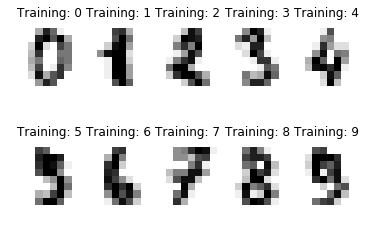

In [3]:
import sklearn.datasets

# We load the dataset
digits = sklearn.datasets.load_digits()

# Here we load up the images and labels and print some examples
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(label), y=1.1)

Next we will divide the images and labels data into two parts i.e. training data and test data.

In [4]:
n_objects = digits.images.shape[0]
train_test_split = 0.7
train_size = int(n_objects * train_test_split)
indices = np.arange(n_objects)
np.random.shuffle(indices)

train_indices, test_indices = indices[:train_size], indices[train_size:]
train_images, train_targets = digits.images[train_indices], digits.target[train_indices]
test_images, test_targets = digits.images[test_indices], digits.target[test_indices]


The images in the dataset are $8 \times 8$ and each pixel in the image is eithe 0 or 1. Before giving the images as input to the neural network we will reshape them to 1 by 64 times long 1 dimensional vector as shown in the figure below.
![in](./src/image_pixel_input.png)

In [5]:
train_images = train_images.reshape((-1, 64))
test_images = test_images.reshape((-1, 64))

The basic units of the neural network are perceptrons. A perceptron consists of a cell with atleast two inputs. Cell takes the inputs multiplied with weights and gives an output after computing the values. The basic diagram of a cell is shown below.
![neuron](./src/neuron.png)
For the image dataset which we will be using in this task the perceptron will have 64 inputs for $8 \times 8$ input and 64 weights.
![N_weights](./src/weights.png)
As the digits dataset consists of 10 classes (0 to 9) so, in order to classifiy the images we will need 10 neurons for the prediction of the target class. It can be seen from the image each neuron will give an output and the output from the neuron with the highest value will be selected and that will be the predicted output.
![NN](./src/design.png)
Now, in order to perform classification task for images you will use the functions which you implemented in the first task of the assignment.

In the following lines of code we will train a complete neural network by giving the images as input and the labels as targets to the network. At first we will design the network by by setting the parameters of network by calling *SequentialNN()* function, after that we will forward propagate the inputs through the network and will calculate the loss, the error between the predicted output and the target output will be back propagated through the network. Finally the parameters of the network will be updated in the direction to reduce the error of the prediction.

In [ ]:
### YOUR CODE FOR TRAINING THE NETWORK###
#Specify the input size for the network
#specify the output size for the network
#specify the inputs for the network
#specify the outputs for the network
#num_input=
#num_output=
#X=
#y=
###
model = SequentialNN()
model.add(Dense(num_input,num_output))

loss = Hinge()
coeff_l2 = 0.0
sgd = SGD(model, lr=0.1, weight_decay=coeff_l2 * 2.0)

for i in range(1000):
    y_pred = model.forward(X)
    loss_value = loss.forward(y_pred, Y) + coeff_l2 * l2_regularizer(model.get_params())
    loss_grad = loss.backward(y_pred, Y)
    model.backward(X, loss_grad)
    sgd.update_params()

After training the network should be tested on test data; images in this task. During the test time unlabeled inputs are given to the network and by using the trained weights from the training cycle of the network the ouput classes for the unlabeled inputs are predicted. The figure below shows the difference between the training and the testing of the network.
![test](./src/Test.PNG)
In the following cell implement the code for testing the network. 

In [12]:
#Testing the network 
###YOUR CODE FOR TESTING THE NETWORK  ###

For further practice and advanced experiments you can use MNIST dataset for the classification of hand written digits. It is a commonly used image dataset for testing the machine learning algorithms. You can load this dataset by using the code from the file *data_utils* in week_1 folder. 